<a href="https://colab.research.google.com/github/AG-2478/LocalRepo/blob/feature1/AirlineEDA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings;
warnings.simplefilter('ignore')
!pip install pystan fbprophet
from fbprophet import Prophet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import LeakyReLU
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from statsmodels.api import OLS
import statsmodels.api as sm
from sklearn.feature_selection import VarianceThreshold
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
import math
from datetime import datetime

In [ ]:
dfn = pd.read_csv('/content/drive/MyDrive/Datasets/Airline_editedfull.csv)
dfn = dfn.replace(np.nan, 0)
dfn = dfn.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)
print(dfn.shape)
dfn.info()



(648743, 71)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648743 entries, 0 to 648742
Data columns (total 71 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   W1                            648743 non-null  float64
 1   W2                            648743 non-null  float64
 2   W3                            648743 non-null  float64
 3   W4                            648743 non-null  float64
 4   W5                            648743 non-null  float64
 5   W6                            648743 non-null  float64
 6   W7                            648743 non-null  float64
 7   Y1                            648743 non-null  float64
 8   Y2                            648743 non-null  float64
 9   Y3                            648743 non-null  float64
 10  Y4                            648743 non-null  float64
 11  Year                          648743 non-null  int64  
 12  Quarter                       6

In [ ]:
dfn.head(3)

,W1,W2,W3,W4,W5,W6,W7,Y1,Y2,Y3,Y4,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,ReportingAirline,TailNumber,FlightNumberReportingAirline,OriginAirportID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateName,OriginWac,DestAirportID,DestCityMarketID,Dest,DestCityName,DestState,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,NAirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,NTotalDelay,NGroundTime,DelayCheck,NCityTrafficFreq,CityTrafficBucket,NStateAirportCount,NFlightUsage,TotalDelayBucket,YearlyBucket,DistanceBucket
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2003,4,11,21,5,21/11/03,UA,N308UA,674,13930,30977,ORD,"Chicago, IL",IL,Illinois,41,12953,31703,LGA,"New York, NY",NY,New York,22,900.0,855.0,-5.0,-1.0,0900-0959,14.0,909.0,1148.0,2.0,1206.0,1150.0,-16.0,-2.0,1200-1259,0.0,0,0.0,126.0,115.0,0.143066,733.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042553,0,1.000000,VeryHighTraffic,0.214286,0.0,0,Y1,mid_range
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2002,2,5,2,4,02/05/02,DL,N325DL,2408,12339,32337,IND,"Indianapolis, IN",IN,Indiana,42,13204,31454,MCO,"Orlando, FL",FL,Florida,33,1300.0,1259.0,-1.0,-1.0,1300-1359,14.0,1313.0,1611.0,8.0,1613.0,1619.0,6.0,0.0,1600-1659,0.0,0,0.0,133.0,140.0,0.170803,828.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060790,0,0.088476,LowTraffic,0.107143,0.0,0,Y1,mid_range
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2004,4,12,21,2,21/12/04,WN,N691WN,1111,10423,30423,AUS,"Austin, TX",TX,Texas,74,11540,30615,ELP,"El Paso, TX",TX,Texas,74,1150.0,1150.0,0.0,0.0,1100-1159,10.0,1200.0,1220.0,5.0,1225.0,1225.0,0.0,0.0,1200-1259,0.0,0,0.0,95.0,95.0,0.115328,528.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039514,0,0.108983,LowTraffic,0.857143,0.0,0,Y1,mid_range


In [ ]:
#df['Date'] = df['DateTime'].dt.strftime('%d/%m/%Y')
#dfn = dfnn.copy()
cols = ['ArrTime','CRSArrTime', 'CRSDepTime', 'DepTime','WheelsOff', 'WheelsOn']
dfn[cols] = dfn[cols].applymap(np.int64)
dfn[cols] = dfn[cols].astype(str)
#df[cols] = pd.to_datetime(df[], format = '%H%M', errors = 'coerce')

In [ ]:
def str_to_datetime_conv(dfn,timestring):
  dfn['minute'] = dfn[timestring].apply(lambda x: str(x)[-2:])
  dfn['hour'] = dfn[timestring].apply(lambda x: str(x)[:-2])
  dfn[timestring] = dfn['hour'] + ':' + dfn['minute']
  dfn[timestring] = dfn['FlightDate'] + " " + dfn[timestring]
  dfn[timestring] = pd.to_datetime(dfn[timestring], errors = 'coerce')
  dfn = dfn.drop(['minute', 'hour'], axis=1)
  return dfn

In [ ]:
#cols = ['ArrTime','CRSArrTime', 'CRSDepTime', 'DepTime','WheelsOff', 'WheelsOn']
dfn= str_to_datetime_conv(dfn, 'ArrTime')
dfn= str_to_datetime_conv(dfn, 'CRSArrTime')
dfn= str_to_datetime_conv(dfn, 'CRSDepTime')
dfn= str_to_datetime_conv(dfn, 'DepTime')
dfn= str_to_datetime_conv(dfn, 'WheelsOff')
dfn= str_to_datetime_conv(dfn, 'WheelsOn')
dfn.head(3)

,W1,W2,W3,W4,W5,W6,W7,Y1,Y2,Y3,Y4,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,ReportingAirline,TailNumber,FlightNumberReportingAirline,OriginAirportID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateName,OriginWac,DestAirportID,DestCityMarketID,Dest,DestCityName,DestState,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,NAirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,NTotalDelay,NGroundTime,DelayCheck,NCityTrafficFreq,CityTrafficBucket,NStateAirportCount,NFlightUsage,TotalDelayBucket,YearlyBucket,DistanceBucket
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2003,4,11,21,5,21/11/03,UA,N308UA,674,13930,30977,ORD,"Chicago, IL",IL,Illinois,41,12953,31703,LGA,"New York, NY",NY,New York,22,2003-11-21 09:00:00,2003-11-21 08:55:00,-5.0,-1.0,0900-0959,14.0,2003-11-21 09:09:00,2003-11-21 11:48:00,2.0,2003-11-21 12:06:00,2003-11-21 11:50:00,-16.0,-2.0,1200-1259,0.0,0,0.0,126.0,115.0,0.143066,733.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042553,0,1.000000,VeryHighTraffic,0.214286,0.0,0,Y1,mid_range
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2002,2,5,2,4,02/05/02,DL,N325DL,2408,12339,32337,IND,"Indianapolis, IN",IN,Indiana,42,13204,31454,MCO,"Orlando, FL",FL,Florida,33,2002-02-05 13:00:00,2002-02-05 12:59:00,-1.0,-1.0,1300-1359,14.0,2002-02-05 13:13:00,2002-02-05 16:11:00,8.0,2002-02-05 16:13:00,2002-02-05 16:19:00,6.0,0.0,1600-1659,0.0,0,0.0,133.0,140.0,0.170803,828.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060790,0,0.088476,LowTraffic,0.107143,0.0,0,Y1,mid_range
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2004,4,12,21,2,21/12/04,WN,N691WN,1111,10423,30423,AUS,"Austin, TX",TX,Texas,74,11540,30615,ELP,"El Paso, TX",TX,Texas,74,2004-12-21 11:50:00,2004-12-21 11:50:00,0.0,0.0,1100-1159,10.0,2004-12-21 12:00:00,2004-12-21 12:20:00,5.0,2004-12-21 12:25:00,2004-12-21 12:25:00,0.0,0.0,1200-1259,0.0,0,0.0,95.0,95.0,0.115328,528.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.039514,0,0.108983,LowTraffic,0.857143,0.0,0,Y1,mid_range


In [ ]:

dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648743 entries, 0 to 648742
Data columns (total 71 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   W1                            648743 non-null  float64       
 1   W2                            648743 non-null  float64       
 2   W3                            648743 non-null  float64       
 3   W4                            648743 non-null  float64       
 4   W5                            648743 non-null  float64       
 5   W6                            648743 non-null  float64       
 6   W7                            648743 non-null  float64       
 7   Y1                            648743 non-null  float64       
 8   Y2                            648743 non-null  float64       
 9   Y3                            648743 non-null  float64       
 10  Y4                            648743 non-null  float64       
 11  Year         

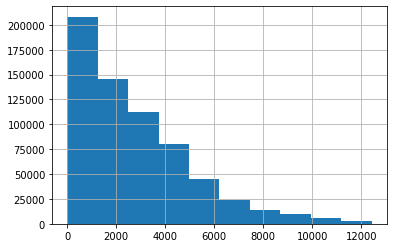

In [ ]:
x = dfn.groupby('NFlightUsage').cumcount()
x.hist()

In [ ]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [ ]:
df = dfn.copy()
midf = df.groupby(['Month']).mean()
widf = df.groupby(['DayOfWeek']).mean() #1-monday, 7-sunday
dmdf = df.groupby(['DayofMonth']).mean()
grp = df.groupby(by=[df.DepTime.map(lambda x : (x.hour))])
didf = grp.mean()
#pd.series.groupby(series.index.hour).mean()
#midf.info()
#midf = midf.to_frame()
#didf = didf.to_frame()
midf = midf.reset_index()
#didf = didf.reset_index()
print('MIDF',midf.head(20))
print('DIDF',didf.head(5))


MIDF     Month        W1  ...  NFlightUsage  TotalDelayBucket
0       1  0.147126  ...      0.017074          0.752174
1       2  0.148723  ...      0.016622          0.762407
2       3  0.145428  ...      0.013994          0.734376
3       4  0.149315  ...      0.013646          0.647670
4       5  0.148247  ...      0.013607          0.676998
5       6  0.148479  ...      0.014011          0.941256
6       7  0.148066  ...      0.013488          0.918762
7       8  0.148707  ...      0.013754          0.774989
8       9  0.148890  ...      0.012825          0.546016
9      10  0.147913  ...      0.013211          0.629701
10     11  0.148356  ...      0.013269          0.590743
11     12  0.146841  ...      0.013144          1.006687

[12 rows x 49 columns]
DIDF                W1        W2  ...  NFlightUsage  TotalDelayBucket
DepTime                      ...                                
1.0      0.146707  0.145210  ...      0.009273          3.929641
2.0      0.103825  0.196721  .

[]

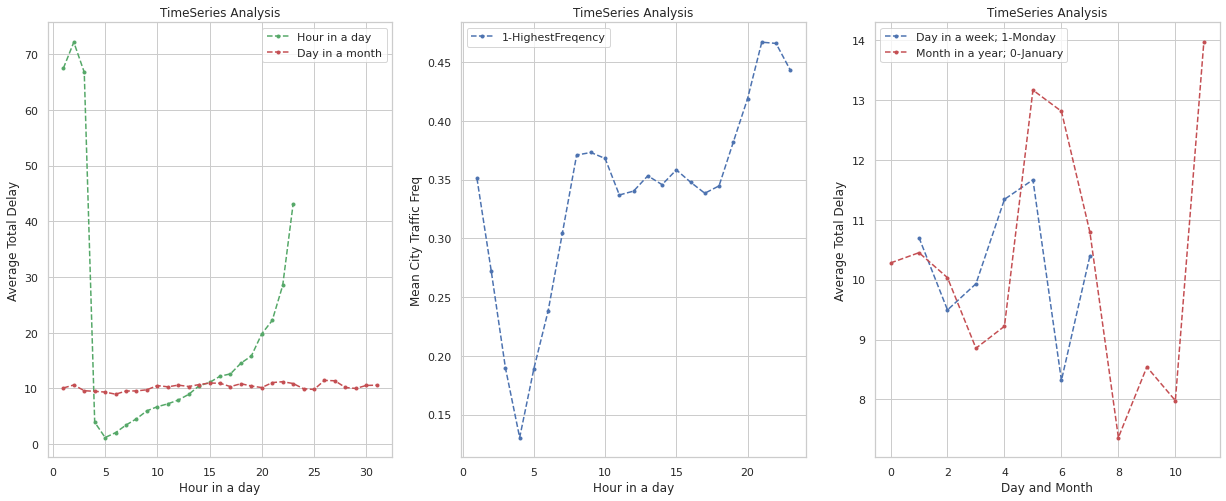

In [ ]:
import seaborn as sns
sns.set(style = 'whitegrid')
plt.figure(figsize=((21,8)))

plt.subplot(1,3,1)
plt.plot(didf.index.values,didf.NTotalDelay,'g.--', label='Hour in a day')
plt.plot(dmdf.index.values,dmdf.NTotalDelay,'r.--', label='Day in a month')
plt.plot()
plt.title('TimeSeries Analysis')
plt.xlabel('Hour in a day')
plt.ylabel('Average Total Delay')
plt.legend()
plt.subplot(1,3,2)
plt.plot(didf.index.values,didf.NCityTrafficFreq,'b.--', label='1-HighestFreqency')
plt.plot()
plt.title('TimeSeries Analysis')
plt.xlabel('Hour in a day')
plt.ylabel('Mean City Traffic Freq')
plt.legend()
plt.subplot(1,3,3)
plt.plot(widf.index.values, widf.NTotalDelay, 'b.--', label='Day in a week; 1-Monday')
plt.plot(midf.index.values, midf.NTotalDelay, 'r--.', label='Month in a year; 0-January')
plt.title('TimeSeries Analysis')
plt.xlabel('Day and Month')
plt.ylabel('Average Total Delay')
plt.legend()
plt.plot()

In [ ]:
df = dfn.copy()
df['FlightDate'] = pd.to_datetime(df['FlightDate'], dayfirst=True)
df = df.sort_values('FlightDate', ascending=True).reset_index()

df['JourneyBtwCities']  = df.groupby(['OriginCityName','DestCityName']).cumcount()+1 #journey between cities
df.head(5)

,index,W1,W2,W3,W4,W5,W6,W7,Y1,Y2,Y3,Y4,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,ReportingAirline,TailNumber,FlightNumberReportingAirline,OriginAirportID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateName,OriginWac,DestAirportID,DestCityMarketID,Dest,DestCityName,DestState,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,NAirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,NTotalDelay,NGroundTime,DelayCheck,NCityTrafficFreq,CityTrafficBucket,NStateAirportCount,NFlightUsage,TotalDelayBucket,YearlyBucket,DistanceBucket,JourneyBtwCities
0,67645,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2001,1,1,1,1,2001-01-01,US,N266Aä,2672,15304,33195,TPA,"Tampa, FL",FL,Florida,33,10721,30721,BOS,"Boston, MA",MA,Massachusetts,13,2001-01-01 17:25:00,2001-01-01 17:51:00,26.0,1.0,1700-1759,9.0,2001-01-01 18:00:00,2001-01-01 20:34:00,9.0,2001-01-01 20:28:00,2001-01-01 20:43:00,15.0,1.0,2000-2059,0.0,0,0.0,183.0,172.0,0.223358,1185.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048632,0,0.175060,ModerateTraffic,0.678571,0.000373,0,Y1,mid_range,1
1,41142,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2001,1,1,1,1,2001-01-01,AA,N5CãA1,1961,14908,32575,SNA,"Santa Ana, CA",CA,California,91,11298,30194,DFW,"Dallas/Fort Worth, TX",TX,Texas,74,2001-01-01 06:48:00,2001-01-01 06:49:00,1.0,0.0,0600-0659,23.0,2001-01-01 07:12:00,2001-01-01 11:41:00,28.0,2001-01-01 11:53:00,2001-01-01 12:09:00,16.0,1.0,1100-1159,0.0,0,0.0,185.0,200.0,0.216058,1205.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148936,0,0.112557,ModerateTraffic,1.000000,0.000187,0,Y1,mid_range,1
2,115571,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2001,1,1,1,1,2001-01-01,WN,N366@@,2124,14107,30466,PHX,"Phoenix, AZ",AZ,Arizona,81,12889,32211,LAS,"Las Vegas, NV",NV,Nevada,85,2001-01-01 16:45:00,2001-01-01 16:45:00,0.0,0.0,1600-1659,9.0,2001-01-01 16:54:00,2001-01-01 16:36:00,4.0,2001-01-01 16:45:00,2001-01-01 16:40:00,-5.0,-1.0,1600-1659,0.0,0,0.0,60.0,55.0,0.059854,256.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033435,0,0.448498,HighTraffic,0.107143,0.002241,0,Y1,short_range,1
3,51389,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2001,1,1,1,1,2001-01-01,MQ,#NAME?,4261,13930,30977,ORD,"Chicago, IL",IL,Illinois,41,14122,30198,PIT,"Pittsburgh, PA",PA,Pennsylvania,23,2001-01-01 13:45:00,2001-01-01 13:39:00,-6.0,-1.0,1300-1359,32.0,2001-01-01 14:11:00,2001-01-01 16:14:00,4.0,2001-01-01 16:19:00,2001-01-01 16:18:00,-1.0,-1.0,1600-1659,0.0,0,0.0,94.0,99.0,0.090511,412.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.103343,0,1.000000,VeryHighTraffic,0.214286,0.347899,0,Y1,short_range,1
4,60474,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2001,1,1,1,1,2001-01-01,UA,N524ä1,838,14771,32457,SFO,"San Francisco, CA",CA,California,91,11618,31703,EWR,"Newark, NJ",NJ,New Jersey,21,2001-01-01 13:25:00,2001-01-01 13:30:00,5.0,0.0,1300-1359,40.0,2001-01-01 14:10:00,2001-01-01 22:05:00,12.0,2001-01-01 21:41:00,2001-01-01 22:17:00,36.0,2.0,2100-2159,0.0,0,0.0,316.0,347.0,0.429197,2565.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151976,0,0.334493,HighTraffic,1.000000,0.000373,0,Y1,long_range,1


In [ ]:
df_ts = dfn[['FlightDate','CRSDepTime','DepTime','WheelsOff','WheelsOn','CRSArrTime','ArrTime','DepDelay','ArrDelay','DelayCheck','TotalDelayBucket','NTotalDelay']]
df_ts['NTotalDelay']=df_ts['ArrDelay']+df_ts['DepDelay']
df_ts.to_csv('AirlineTimeseries.csv')
df_ts.head(30)

,FlightDate,CRSDepTime,DepTime,WheelsOff,WheelsOn,CRSArrTime,ArrTime,DepDelay,ArrDelay,DelayCheck,TotalDelayBucket,NTotalDelay
0,21/11/03,2003-11-21 09:00:00,2003-11-21 08:55:00,2003-11-21 09:09:00,2003-11-21 11:48:00,2003-11-21 12:06:00,2003-11-21 11:50:00,-5.0,-16.0,0,0,-21.0
1,02/05/02,2002-02-05 13:00:00,2002-02-05 12:59:00,2002-02-05 13:13:00,2002-02-05 16:11:00,2002-02-05 16:13:00,2002-02-05 16:19:00,-1.0,6.0,0,0,5.0
2,21/12/04,2004-12-21 11:50:00,2004-12-21 11:50:00,2004-12-21 12:00:00,2004-12-21 12:20:00,2004-12-21 12:25:00,2004-12-21 12:25:00,0.0,0.0,0,0,0.0
3,06/06/03,2003-06-06 13:30:00,2003-06-06 13:30:00,2003-06-06 13:33:00,2003-06-06 14:44:00,2003-06-06 14:55:00,2003-06-06 15:19:00,0.0,24.0,1,2,24.0
4,11/10/01,2001-11-10 06:50:00,2001-11-10 06:50:00,2001-11-10 07:05:00,2001-11-10 08:47:00,2001-11-10 08:50:00,2001-11-10 08:50:00,0.0,0.0,0,0,0.0
5,14/08/05,2005-08-14 18:30:00,2005-08-14 18:24:00,2005-08-14 19:02:00,2005-08-14 18:45:00,2005-08-14 18:55:00,2005-08-14 18:51:00,-6.0,-4.0,0,0,-10.0
6,21/07/05,2005-07-21 12:30:00,2005-07-21 12:27:00,2005-07-21 12:47:00,2005-07-21 14:49:00,2005-07-21 15:06:00,2005-07-21 14:56:00,-3.0,-10.0,0,0,-13.0
7,18/01/05,2005-01-18 20:59:00,2005-01-18 21:38:00,2005-01-18 21:51:00,NaT,2005-01-18 23:42:00,NaT,39.0,26.0,1,2,65.0
8,12/01/04,2004-12-01 11:57:00,2004-12-01 11:53:00,2004-12-01 12:05:00,2004-12-01 13:56:00,2004-12-01 14:10:00,2004-12-01 14:01:00,-4.0,-9.0,0,0,-13.0
9,06/10/01,2001-06-10 22:55:00,2001-06-10 22:42:00,2001-06-10 22:54:00,2001-06-10 05:20:00,2001-06-10 05:55:00,2001-06-10 05:24:00,-13.0,-31.0,0,0,-44.0


In [ ]:
df_state_percent = df.OriginStateName.value_counts() + df.DestStateName.value_counts()
dfsp = pd.DataFrame(df_state_percent).reset_index()
dfsp.columns = ['State', 'count']
dfsp['TrafficPercent'] = (dfsp['count'] / dfsp['count'].sum()) * 100
dfsp = dfsp.sort_values(by ='State')
dfsp = dfsp.sort_index(ascending=True)
dav = pd.DataFrame(df.groupby('OriginStateName')['NTotalDelay'].sum()).reset_index()
dfsp = pd.merge(left=dfsp, left_index=True,
                  right=dav, right_index=True,
                  how='inner')
dfsp=dfsp.reset_index()
dfsp.set_index('index', inplace=True)
dfsp['DelayPercent'] = (dfsp['NTotalDelay'] / dfsp['NTotalDelay'].sum()) * 100
dfsp=dfsp.drop('OriginStateName', axis=1)
dfsp['Metric'] = (dfsp['count'] / dfsp['NTotalDelay']) #Traffic per Minute Delay of all flights in that state # More is the number better is the delay management
dfsp

In [ ]:
dfsp = dfsp.rename(columns ={'State':'OriginStateName','count':'StateTraffic','Metric':'TrafficPerMinuteDelay','NTotalDelay':'StateSumOfDelays'})

In [ ]:
dfsp.head(3)

,OriginStateName,StateTraffic,TrafficPercent,StateSumOfDelays,DelayPercent,TrafficPerMinuteDelay
index,,,,,,
0,Alabama,7792,0.600546,42419.0,0.633993,0.183691
1,Alaska,8047,0.620199,32478.0,0.485415,0.247768
2,Arizona,42531,3.277954,157642.0,2.356113,0.269795


In [ ]:
tdf = df.merge(dfsp, on='OriginStateName', how='left')
tdf.head(3)

,index,W1,W2,W3,W4,W5,W6,W7,Y1,Y2,Y3,Y4,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,ReportingAirline,TailNumber,FlightNumberReportingAirline,OriginAirportID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateName,OriginWac,DestAirportID,DestCityMarketID,Dest,DestCityName,DestState,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,NAirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,NTotalDelay,NGroundTime,DelayCheck,NCityTrafficFreq,CityTrafficBucket,NStateAirportCount,NFlightUsage,TotalDelayBucket,YearlyBucket,DistanceBucket,JourneyBtwCities,StateTraffic,TrafficPercent,StateSumOfDelays,DelayPercent,TrafficPerMinuteDelay
0,67645,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2001,1,1,1,1,2001-01-01,US,N266Aä,2672,15304,33195,TPA,"Tampa, FL",FL,Florida,33,10721,30721,BOS,"Boston, MA",MA,Massachusetts,13,2001-01-01 17:25:00,2001-01-01 17:51:00,26.0,1.0,1700-1759,9.0,2001-01-01 18:00:00,2001-01-01 20:34:00,9.0,2001-01-01 20:28:00,2001-01-01 20:43:00,15.0,1.0,2000-2059,0.0,0,0.0,183.0,172.0,0.223358,1185.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048632,0,0.175060,ModerateTraffic,0.678571,0.000373,0,Y1,mid_range,1,88237,6.800613,458230.0,6.848694,0.192561
1,41142,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2001,1,1,1,1,2001-01-01,AA,N5CãA1,1961,14908,32575,SNA,"Santa Ana, CA",CA,California,91,11298,30194,DFW,"Dallas/Fort Worth, TX",TX,Texas,74,2001-01-01 06:48:00,2001-01-01 06:49:00,1.0,0.0,0600-0659,23.0,2001-01-01 07:12:00,2001-01-01 11:41:00,28.0,2001-01-01 11:53:00,2001-01-01 12:09:00,16.0,1.0,1100-1159,0.0,0,0.0,185.0,200.0,0.216058,1205.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148936,0,0.112557,ModerateTraffic,1.000000,0.000187,0,Y1,mid_range,1,154908,11.939088,653507.0,9.767299,0.237041
2,115571,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2001,1,1,1,1,2001-01-01,WN,N366@@,2124,14107,30466,PHX,"Phoenix, AZ",AZ,Arizona,81,12889,32211,LAS,"Las Vegas, NV",NV,Nevada,85,2001-01-01 16:45:00,2001-01-01 16:45:00,0.0,0.0,1600-1659,9.0,2001-01-01 16:54:00,2001-01-01 16:36:00,4.0,2001-01-01 16:45:00,2001-01-01 16:40:00,-5.0,-1.0,1600-1659,0.0,0,0.0,60.0,55.0,0.059854,256.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033435,0,0.448498,HighTraffic,0.107143,0.002241,0,Y1,short_range,1,42531,3.277954,157642.0,2.356113,0.269795


In [ ]:
int_to_str_col = ['FlightNumberReportingAirline','OriginAirportID']

drop_col = ['Y1', 'Y2','W1','W2','W3','W4','W5','W6','W7','Month','DayOfWeek','DayofMonth', 'Y3', 'Y4','Year', 'Quarter','ReportingAirline','CityTrafficBucket', 'DistanceGroup','OriginWac','Origin','OriginState', 'OriginCityMarketID',
            'DestCityMarketID', 'Dest','DestState', 'DestWac', 'DepTimeBlk', 'DepartureDelayGroups', 'ArrivalDelayGroups', 'YearlyBucket', 'DistanceBucket', 'ArrTimeBlk',
            'FlightDate', 'Cancelled',	'CancellationCode',	'Diverted','index']

tdf.drop(drop_col, axis = 1,inplace=True)
tdf[int_to_str_col] = tdf[int_to_str_col].astype(str)
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648743 entries, 0 to 648742
Data columns (total 40 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   TailNumber                    648743 non-null  object        
 1   FlightNumberReportingAirline  648743 non-null  object        
 2   OriginAirportID               648743 non-null  object        
 3   OriginCityName                648743 non-null  object        
 4   OriginStateName               648743 non-null  object        
 5   DestAirportID                 648743 non-null  int64         
 6   DestCityName                  648743 non-null  object        
 7   DestStateName                 648743 non-null  object        
 8   CRSDepTime                    647825 non-null  datetime64[ns]
 9   DepTime                       646888 non-null  datetime64[ns]
 10  DepDelay                      648743 non-null  float64       
 11  TaxiOut      

In [ ]:
x = tdf.groupby(['OriginCityName','DestCityName']).count()
x.nlargest(10, ['OriginStateName'])

TailNumber  ...  TrafficPerMinuteDelay
OriginCityName  DestCityName                   ...                       
New York, NY    Boston, MA               1632  ...                   1632
Boston, MA      New York, NY             1621  ...                   1621
Washington, DC  New York, NY             1480  ...                   1480
New York, NY    Washington, DC           1443  ...                   1443
                Chicago, IL              1429  ...                   1429
Chicago, IL     Washington, DC           1340  ...                   1340
Washington, DC  Chicago, IL              1276  ...                   1276
Atlanta, GA     New York, NY             1262  ...                   1262
Los Angeles, CA San Francisco, CA        1260  ...                   1260
Las Vegas, NV   Los Angeles, CA          1245  ...                   1245

[10 rows x 38 columns]

In [ ]:
pd.get_dummies(tdf['FlightNumberReportingAirline']).shape

(648743, 7973)

In [ ]:
tdf = tdf.dropna(axis=0)
tdf.shape

(635863, 40)

In [ ]:
print(tdf.isnull().sum())

TailNumber                      0
FlightNumberReportingAirline    0
OriginAirportID                 0
OriginCityName                  0
OriginStateName                 0
DestAirportID                   0
DestCityName                    0
DestStateName                   0
CRSDepTime                      0
DepTime                         0
DepDelay                        0
TaxiOut                         0
WheelsOff                       0
WheelsOn                        0
TaxiIn                          0
CRSArrTime                      0
ArrTime                         0
ArrDelay                        0
CRSElapsedTime                  0
ActualElapsedTime               0
NAirTime                        0
Distance                        0
CarrierDelay                    0
WeatherDelay                    0
NASDelay                        0
SecurityDelay                   0
LateAircraftDelay               0
NTotalDelay                     0
NGroundTime                     0
DelayCheck    

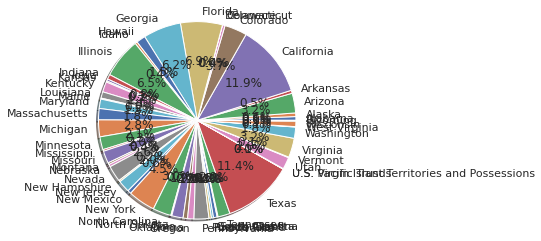

In [ ]:
labels = tdf['OriginStateName'].astype('category').cat.categories.tolist()
counts = tdf['OriginStateName'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [ ]:
tdf.OriginStateName.value_counts().sort_values(ascending=False).head(7)

California    75367
Texas         72578
Florida       43563
Illinois      41635
Georgia       39395
New York      28346
Colorado      23439
Name: OriginStateName, dtype: int64

In [ ]:
tdf.OriginCityName.value_counts().sort_values(ascending=False).head(7)

Chicago, IL              39838
Atlanta, GA              37570
Dallas/Fort Worth, TX    27787
Houston, TX              23632
Los Angeles, CA          20678
Denver, CO               20566
New York, NY             20111
Name: OriginCityName, dtype: int64

In [ ]:
tdf.TailNumber.value_counts().sort_values(ascending=False).head(7)

#NAME?    5240
N478HA     369
N485HA     359
N486HA     355
N476HA     355
N481HA     341
N477HA     337
Name: TailNumber, dtype: int64

In [ ]:

def one_hot_top_5(df, variable):

  for label in top_x:
    df[variable+'_'+label] = np.where(data)

In [ ]:
from collections import Counter

def encoding_top5_variables(df4,variable,strin):
  top5 = [x for x in df4[variable].value_counts().sort_values(ascending=False).head(5).index]
  other = [x for x in df4[variable].value_counts().sort_values(ascending=False)]
  #print('0',len(other))
  #other = list((Counter(other)-Counter(top5)).elements())
  #print(other)
  #print('1',len(other))
  #other = [x if x not in other else "other" for x in other]
  #print(other)
  #print('2',len(other))
  #print(top5)
  #print(len(other))
  df4 = pd.concat([df4,pd.get_dummies(top5, prefix=strin)],axis=1)
  return df4

In [ ]:
df4 = tdf.copy()
df4 = encoding_top5_variables(df4,'OriginAirportID','AptID')
df4 = encoding_top5_variables(df4,'TailNumber','TNo')
df4 = encoding_top5_variables(df4,'FlightNumberReportingAirline','FltNo')
df4 = encoding_top5_variables(df4,'OriginCityName','OrCity')
df4 = encoding_top5_variables(df4,'OriginCityName','OrCity')
df4 = encoding_top5_variables(df4,'OriginStateName','OrState')
df4.head(5)

,TailNumber,FlightNumberReportingAirline,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,CRSDepTime,DepTime,DepDelay,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,CRSElapsedTime,ActualElapsedTime,NAirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,NTotalDelay,NGroundTime,DelayCheck,NCityTrafficFreq,NStateAirportCount,NFlightUsage,TotalDelayBucket,JourneyBtwCities,StateTraffic,TrafficPercent,StateSumOfDelays,DelayPercent,TrafficPerMinuteDelay,AptID_10397,AptID_11292,AptID_11298,AptID_12892,AptID_13930,TNo_#NAME?,TNo_N476HA,TNo_N478HA,TNo_N485HA,TNo_N486HA,FltNo_16,FltNo_3,FltNo_5,FltNo_55,FltNo_64,"OrCity_Atlanta, GA","OrCity_Chicago, IL","OrCity_Dallas/Fort Worth, TX","OrCity_Houston, TX","OrCity_Los Angeles, CA","OrCity_Atlanta, GA","OrCity_Chicago, IL","OrCity_Dallas/Fort Worth, TX","OrCity_Houston, TX","OrCity_Los Angeles, CA",OrState_California,OrState_Florida,OrState_Georgia,OrState_Illinois,OrState_Texas
0,N266Aä,2672,15304,"Tampa, FL",Florida,10721,"Boston, MA",Massachusetts,2001-01-01 17:25:00,2001-01-01 17:51:00,26.0,9.0,2001-01-01 18:00:00,2001-01-01 20:34:00,9.0,2001-01-01 20:28:00,2001-01-01 20:43:00,15.0,183.0,172.0,0.223358,1185.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048632,0,0.175060,0.678571,0.000373,0,1,88237,6.800613,458230.0,6.848694,0.192561,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,N5CãA1,1961,14908,"Santa Ana, CA",California,11298,"Dallas/Fort Worth, TX",Texas,2001-01-01 06:48:00,2001-01-01 06:49:00,1.0,23.0,2001-01-01 07:12:00,2001-01-01 11:41:00,28.0,2001-01-01 11:53:00,2001-01-01 12:09:00,16.0,185.0,200.0,0.216058,1205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148936,0,0.112557,1.000000,0.000187,0,1,154908,11.939088,653507.0,9.767299,0.237041,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,N366@@,2124,14107,"Phoenix, AZ",Arizona,12889,"Las Vegas, NV",Nevada,2001-01-01 16:45:00,2001-01-01 16:45:00,0.0,9.0,2001-01-01 16:54:00,2001-01-01 16:36:00,4.0,2001-01-01 16:45:00,2001-01-01 16:40:00,-5.0,60.0,55.0,0.059854,256.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033435,0,0.448498,0.107143,0.002241,0,1,42531,3.277954,157642.0,2.356113,0.269795,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,#NAME?,4261,13930,"Chicago, IL",Illinois,14122,"Pittsburgh, PA",Pennsylvania,2001-01-01 13:45:00,2001-01-01 13:39:00,-6.0,32.0,2001-01-01 14:11:00,2001-01-01 16:14:00,4.0,2001-01-01 16:19:00,2001-01-01 16:18:00,-1.0,94.0,99.0,0.090511,412.0,0.0,0.0,0.0,0.0,0.0,0.0,0.103343,0,1.000000,0.214286,0.347899,0,1,85831,6.615177,595893.0,8.906201,0.144038,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,N524ä1,838,14771,"San Francisco, CA",California,11618,"Newark, NJ",New Jersey,2001-01-01 13:25:00,2001-01-01 13:30:00,5.0,40.0,2001-01-01 14:10:00,2001-01-01 22:05:00,12.0,2001-01-01 21:41:00,2001-01-01 22:17:00,36.0,316.0,347.0,0.429197,2565.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151976,0,0.334493,1.000000,0.000373,0,1,154908,11.939088,653507.0,9.767299,0.237041,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df4.to_csv('FlightDatasetModel1.0.csv')

In [ ]:
df.shape

In [ ]:
pd.get_dummies(tdf['FlightNumberReportingAirline'])

In [ ]:

df4 = pd.concat([df4,pd.get_dummies(other, prefix='St')],axis=1)
#now drop the original 'country' column (you don't need it anymore)
#tdf.drop(['country'],axis=1, inplace=True)
df4

In [ ]:
otherstates = df.groupby('a')['b'].apply(list)